In [8]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
#load dataset after preprocessing
dna = pd.read_csv('d_na.csv')
dns = pd.read_csv('d_ns.csv')
dsa = pd.read_csv('d_sa.csv')
dss = pd.read_csv('d_ss.csv')

In [12]:
# Define texts and labels
texts = dna['Ulasan'].astype(str)
labels = dna[['Pelayanan', 'Fasilitas', 'Kuliner', 'Wahana', 'Label']]
labels = labels.astype(int)

# Convert labels to one-hot encoding
y_train_pelayanan = to_categorical(labels['Pelayanan'])
y_train_fasilitas = to_categorical(labels['Fasilitas'])
y_train_kuliner = to_categorical(labels['Kuliner'])
y_train_wahana = to_categorical(labels['Wahana'])
y = np.concatenate([y_train_pelayanan, y_train_fasilitas, y_train_kuliner, y_train_wahana], axis=1)

# Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
le = LabelEncoder()
y = np.argmax(y, axis=1)
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(dna_token.word_index) + 1, input_length=50, output_dim=50))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, return_sequences=True)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.4))
model.add(Dense(20, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Get predicted labels
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Print classification report and confusion matrix
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot graphs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc, label='Training Accuracy')


Epoch 1/100


ValueError: in user code:

    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "D:\Anaconda\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\Anaconda\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\Anaconda\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\Anaconda\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\Anaconda\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 20) are incompatible


In [10]:
model.save('n_a.h5')

Epoch 1/100
7/7 [==============================] - 10s 662ms/step - loss: 0.6804 - accuracy: 0.5847 - val_loss: 0.6565 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6629 - accuracy: 0.6265 - val_loss: 0.6606 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6506 - accuracy: 0.6265 - val_loss: 0.6514 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6458 - accuracy: 0.6265 - val_loss: 0.6403 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6184 - accuracy: 0.6265 - val_loss: 0.6149 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 35ms/step - loss: 0.5804 - accuracy: 0.6265 - val_loss: 0.5757 - val_accuracy: 0.6204
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 0.4854 - accuracy: 0.7494 - val_loss: 0.6263 - val_accuracy: 0.7778
Epoch 8/100
7/7 [=

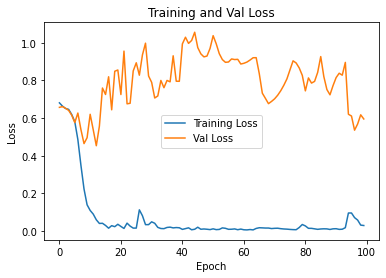

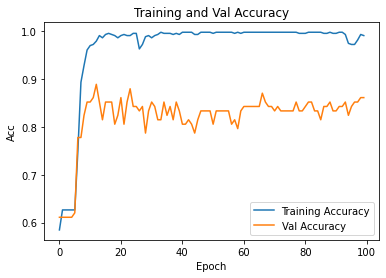

In [7]:
#Model Sentiment with NLTK stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dns['Ulasan'].astype(str)
labels = dns['Label']

#Tokenizer and Pad Sequence
dns_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dns_token.fit_on_texts(texts)
X = dns_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model1 = Sequential()
model1.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model1.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model1.add(Dropout(0.6))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Bidirectional(LSTM(units = 64)))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model1.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
model1.save('n_s.h5')

Epoch 1/100
7/7 [==============================] - 8s 264ms/step - loss: 0.6842 - accuracy: 0.6265 - val_loss: 0.6689 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 39ms/step - loss: 0.6534 - accuracy: 0.6265 - val_loss: 0.6551 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 40ms/step - loss: 0.6597 - accuracy: 0.6265 - val_loss: 0.6466 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 41ms/step - loss: 0.6398 - accuracy: 0.6265 - val_loss: 0.6375 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 48ms/step - loss: 0.6198 - accuracy: 0.6265 - val_loss: 0.6178 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 0.5911 - accuracy: 0.6265 - val_loss: 0.5769 - val_accuracy: 0.6111
Epoch 7/100
7/7 [==============================] - 0s 43ms/step - loss: 0.5372 - accuracy: 0.6334 - val_loss: 0.5206 - val_accuracy: 0.6296
Epoch 8/100
7/7 [==

Epoch 59/100
7/7 [==============================] - 0s 36ms/step - loss: 8.0347e-04 - accuracy: 1.0000 - val_loss: 0.7428 - val_accuracy: 0.8796
Epoch 60/100
7/7 [==============================] - 0s 36ms/step - loss: 9.2323e-04 - accuracy: 1.0000 - val_loss: 0.7435 - val_accuracy: 0.8796
Epoch 61/100
7/7 [==============================] - 0s 40ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7515 - val_accuracy: 0.8796
Epoch 62/100
7/7 [==============================] - 0s 38ms/step - loss: 8.4025e-04 - accuracy: 1.0000 - val_loss: 0.7645 - val_accuracy: 0.8611
Epoch 63/100
7/7 [==============================] - 0s 41ms/step - loss: 6.6196e-04 - accuracy: 1.0000 - val_loss: 0.7592 - val_accuracy: 0.8611
Epoch 64/100
7/7 [==============================] - 0s 39ms/step - loss: 8.0932e-04 - accuracy: 1.0000 - val_loss: 0.7294 - val_accuracy: 0.8796
Epoch 65/100
7/7 [==============================] - 0s 44ms/step - loss: 7.2554e-04 - accuracy: 1.0000 - val_loss: 0.7588 - val_accura

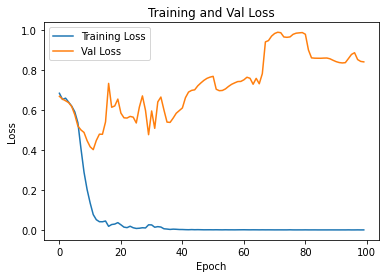

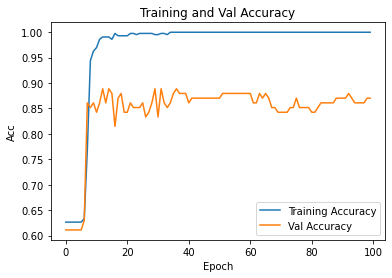

In [8]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Label']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [12]:
model2.save('s_a.h5')

Epoch 1/100
7/7 [==============================] - 9s 258ms/step - loss: 0.6725 - accuracy: 0.6265 - val_loss: 0.6524 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6551 - accuracy: 0.6265 - val_loss: 0.6490 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 40ms/step - loss: 0.6432 - accuracy: 0.6265 - val_loss: 0.6341 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6232 - accuracy: 0.6265 - val_loss: 0.6232 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.5975 - accuracy: 0.6265 - val_loss: 0.5647 - val_accuracy: 0.6296
Epoch 6/100
7/7 [==============================] - 0s 38ms/step - loss: 0.4988 - accuracy: 0.7425 - val_loss: 0.5050 - val_accuracy: 0.7593
Epoch 7/100
7/7 [==============================] - 0s 39ms/step - loss: 0.3454 - accuracy: 0.8886 - val_loss: 0.4391 - val_accuracy: 0.8611
Epoch 8/100
7/7 [==

Epoch 59/100
7/7 [==============================] - 0s 38ms/step - loss: 4.5391e-04 - accuracy: 1.0000 - val_loss: 0.7945 - val_accuracy: 0.8889
Epoch 60/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0439 - accuracy: 0.9954 - val_loss: 1.0901 - val_accuracy: 0.8426
Epoch 61/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.8098 - val_accuracy: 0.8519
Epoch 62/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0278 - accuracy: 0.9838 - val_loss: 1.2627 - val_accuracy: 0.8148
Epoch 63/100
7/7 [==============================] - 0s 41ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 1.0299 - val_accuracy: 0.8148
Epoch 64/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0208 - accuracy: 0.9907 - val_loss: 1.0211 - val_accuracy: 0.8241
Epoch 65/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 1.1753 - val_accuracy: 0.7963
Epoch 66/

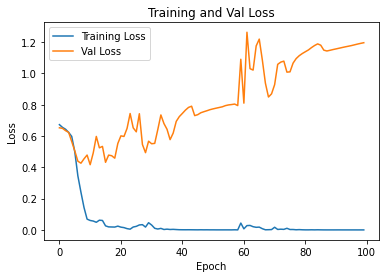

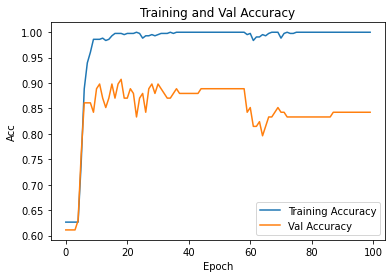

In [9]:
#Model Sentiment with Sastrawi stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dss['Ulasan']
labels = dss['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model3 = Sequential()
model3.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model3.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model3.add(Dropout(0.6))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Bidirectional(LSTM(units = 64)))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model3.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [13]:
model3.save('s_s.h5')